In [27]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.reset_default_graph()
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../../MNIST_data/", one_hot=True)

'''
To classify images using a recurrent neural network, we consider every image
row as a sequence of pixels. Because MNIST image shape is 28*28px, we will then
handle 28 sequences of 28 steps for every sample.
'''

# Training Parameters
learning_rate = 0.001
training_steps = 1000
batch_size = 16
display_step = 200

# Network Parameters

num_input = 28 # MNIST data input (img shape: 28*28)
timesteps = 27 #timesteps
num_hidden = 128 # hidden layer num of features
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, None, num_input])
Y = tf.placeholder("float", [None, None, num_input])

# the lstm cell
lstm = tf.contrib.rnn.BasicLSTMCell(num_hidden)
initial_state = lstm.zero_state(1, dtype=tf.float32)

output, state = tf.nn.dynamic_rnn(lstm, X, dtype=tf.float32)

w = tf.Variable(tf.random_normal([num_hidden, num_input], stddev = 0.05))
b = tf.Variable(tf.random_normal([num_input], stddev = 0.05))

output_reshaped = tf.reshape(output, [-1, num_hidden])

output_modified = tf.matmul(output_reshaped, w) + b
last_output = tf.reshape(output_modified, tf.shape(X))

loss = tf.reduce_sum(( Y - last_output) * ( Y - last_output ))

optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(loss)


init = tf.global_variables_initializer()




    
#just some config for not getting whole server
gpu_options = tf.GPUOptions(allow_growth=True)
config = tf.ConfigProto(gpu_options=gpu_options)
# Start training
sess = tf.Session(config = config)

# Run the initializer
sess.run(init)

total_loss = 0
for step in range(1, training_steps+1):
#To implement training  
    ##training batches
    batch, _ = mnist.train.next_batch(batch_size)

    X_batch = np.zeros((batch_size, 784 - num_input, num_input))
    Y_batch = np.zeros((batch_size, 784 - num_input, num_input))
    for i in range(784 - num_input):
        X_batch[:, i , :] = batch[:, i:i + num_input]
        Y_batch[:, i, :] = batch[:, i + 1:i + 1 + num_input]


#         X_batch, Y_batch = batch[:, 0:timesteps,:], batch[:, 1:timesteps + 1,:]
    _, loss_batch= sess.run([optimizer, loss], feed_dict={X: X_batch, Y: Y_batch})
    total_loss += loss_batch

    if step % 100 == 0:
        print('step {}, Average loss : {}'.format(step, total_loss / 100))
        total_loss = 0

print("Optimization Finished!")

    

Extracting ../../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../MNIST_data/t10k-labels-idx1-ubyte.gz
step 100, Average loss : 9781.442783203125
step 200, Average loss : 3116.601389160156
step 300, Average loss : 1828.0103503417968
step 400, Average loss : 1250.8269140625
step 500, Average loss : 927.6420819091796
step 600, Average loss : 733.0518328857422
step 700, Average loss : 552.903171081543
step 800, Average loss : 439.374384765625
step 900, Average loss : 352.7305807495117
step 1000, Average loss : 291.7540570068359
Optimization Finished!


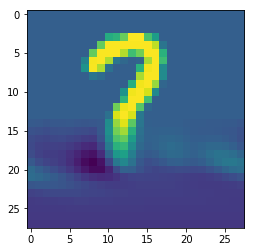

In [28]:
# Calculate accuracy for 128 mnist test images
test_data = mnist.test.images[1:2]


X_batch = np.zeros((batch_size, 392 - num_input + 1, num_input))
for i in range(392 - num_input + 1):
    X_batch[:, i , :] = test_data[:, i:i + num_input]

last_show = np.zeros((1 ,28, 28))
last_show[0 , 0:14, :] = (test_data[0, 0:392]).reshape(14, 28)

for i in range(392):
    out = sess.run(last_output, feed_dict={X: X_batch})
    last_show[0, 14 + (i //28),  i % 28] = out[0, -1, -1]
    
    X_batch[:, :-1] = X_batch[:, 1:]
    X_batch[:, -1, :-1] = X_batch[:, -1, 1:]
    X_batch[:, -1, -1] = out[:, -1, -1]
    
plt.imshow(last_show[0])
plt.show()


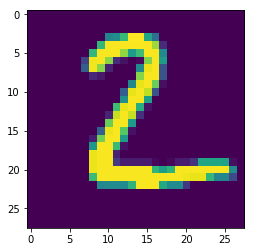

In [29]:
plt.imshow(test_data[0].reshape(28,28))
plt.show()


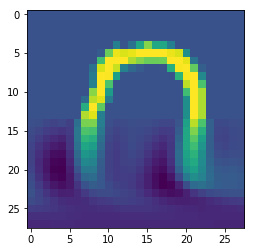

In [30]:
# Calculate accuracy for 128 mnist test images
test_data = mnist.test.images[10:11]


X_batch = np.zeros((batch_size, 392 - num_input + 1, num_input))
for i in range(392 - num_input + 1):
    X_batch[:, i , :] = test_data[:, i:i + num_input]

last_show = np.zeros((1 ,28, 28))
last_show[0 , 0:14, :] = (test_data[0, 0:392]).reshape(14, 28)

for i in range(392):
    out = sess.run(last_output, feed_dict={X: X_batch})
    last_show[0, 14 + (i //28),  i % 28] = out[0, -1, -1]
    
    X_batch[:, :-1] = X_batch[:, 1:]
    X_batch[:, -1, :-1] = X_batch[:, -1, 1:]
    X_batch[:, -1, -1] = out[:, -1, -1]
    
plt.imshow(last_show[0])
plt.show()


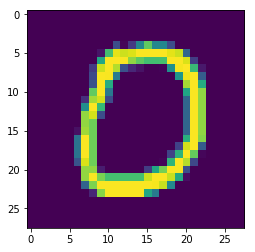

In [31]:
plt.imshow(test_data[0].reshape(28,28))
plt.show()

In [ ]:
sess.close()